In [61]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
from scipy.optimize import minimize
from pandas_datareader import DataReader
from datetime import datetime
from sklearn.metrics import mean_squared_error

In [41]:
#finding the Slope of linear regression line
def Slope(a,b):
    n=len(a)
    two_sum=np.sum(a*b)
    sumX=np.sum(a)
    sumY=np.sum(b)
    sumX_2=np.sum(a**2)
    slope=(n*two_sum-sumX*sumY)/(n*sumX_2-(sumX)**2)
    return slope

In [42]:
def Intercept(a,b):
    intercept=np.mean(b)-Slope(a,b)*np.mean(a)
    return intercept

In [43]:
def Predictions(slope,x_input,intercept):
    predict=slope*x_input + intercept
    return predict


In [44]:
def R_squared(predicted_values,test_values):
    f=predicted_values
    y=test_values
    print(f,'\n\n',y)
    #sum of squares
    ss_total=np.sum((y-np.mean(y))**2)
    #regression sum
    #ss_reg=np.sum((f-np.mean(y))**2)
    #Residuals sum of squares
    ss_res=np.sum((y-f)**2)
    #R-squared formula
    R_2=1-(ss_res/ss_total)
    return R_2


In [45]:
#Finding Correlation Coefficient for the given X & Y values
def correlation_coeff(predicted_values,test_values):
    a=predicted_values
    b=test_values
    n=len(a)
    two_sum=np.sum(a*b)
    sumX=np.sum(a)
    sumY=np.sum(b)
    sumX_2=np.sum(a**2)
    sumY_2=np.sum(b**2)
    score=(n*two_sum-sumX*sumY)/np.sqrt((n*sumX_2-(sumX)**2)*(n*sumY_2-(sumY)**2))
    return score

#Finding Covariance for the given X & Y values
def Covariance(X,Y):
    a=X
    b=Y
    n=len(a)
    two_sum=np.sum(a*b)
    cov=two_sum/n-np.mean(a)*np.mean(b)
    return cov

In [46]:
# One year data for P&G:
PG = DataReader('PG',  'yahoo', datetime(2009,1,1), datetime(2019,12,31));

# Avergae of opening and closing:
avg = list()
for i in range(len(PG)):
    avg = (PG["Open"] + PG["Close"])/2
PG["Average"] = avg

avg
# Required Dataset: 
PG.head()

,High,Low,Open,Close,Volume,Adj Close,Average
Date,,,,,,,
2009-01-02,62.970001,61.060001,61.689999,62.799999,11135700.0,44.174007,62.244999
2009-01-05,62.439999,61.590000,62.320000,62.349998,14322800.0,43.857475,62.334999
2009-01-06,62.950001,61.509998,62.500000,62.169998,13401600.0,43.730865,62.334999
2009-01-07,61.660000,60.639999,61.330002,61.080002,12415600.0,42.964157,61.205002
2009-01-08,61.250000,60.000000,60.910000,60.410000,11508100.0,42.492859,60.660000


In [47]:
# Split-out validation dataset
#knowing the dimenstions of data and making them READY for PREDICTIONS.
array = PG.values
X = array[:,0]
#print(X.shape)
#X=X.reshape(1,-1).T
print(X.shape)
Y = array[:,1]
print(Y.shape)

(2768,)
(2768,)


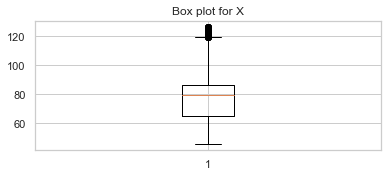

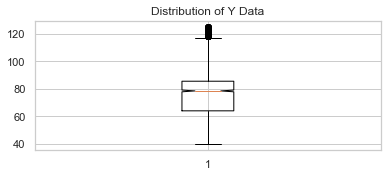

In [48]:
#To know the distribution of data let us plot box plot
## 1
left = 0.1
width = 0.8
#fig=plt.figure()
#fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,sharex=False,sharey=True)
ax1 = plt.axes([left, 0.5, width, 0.45])
ax1.boxplot(X)
ax1.set_title('Box plot for X')
plt.show()
## 2
ax2 = plt.axes([left, 0.5, width, 0.45])
ax2.boxplot(Y, '.-')
ax2.set_title('Distribution of Y Data')
plt.show()


In [49]:
#Covariation in data
print(Covariance(X,Y))


246.47825816511067


In [50]:
#Dividing data into training and testing classes
test_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size= test_size, random_state=seed)


In [51]:
#finding intercepts of rgression line
intercept=Intercept(X_train,Y_train)
slope=Slope(X_train,Y_train)
print(intercept,slope)
predictions=Predictions(slope=slope,x_input=X_validation,intercept=intercept)
print(predictions)
print(R_squared(predicted_values=predictions,test_values=Y_validation))
print(correlation_coeff(test_values=Y_validation,predicted_values=predictions))

-0.3557776779123145 0.9919982743017838
[ 82.96215526  75.34360821  77.54584559 102.83187948 123.52496409
  90.53110694  59.69979876  90.84854608  79.57944508  61.81275236
  81.8114412   79.29176467  74.37145414  80.51191831  84.90647097
  80.17464253  86.47383006  87.80311168  60.1065179   77.87320684
 120.72752926  76.6431311   82.0792774   66.87194204  85.33303053
  60.89019744  85.66039178  87.10870835  60.99931407 121.04496841
 101.83988121  82.45624159  55.15644484  62.09051445  61.64411447
 118.33681736  64.52091098  82.34712118  83.24983567  76.94072604
 124.39792742  79.55960088  78.90488595  87.53526791  61.91195445
  56.81308393 117.81105948  65.36410799  83.944239    88.03126705
  79.53976424  58.74748132  80.78968419  61.87227361  61.28699448
  66.32634753  56.1286027   63.43962892  75.59160778  83.29943861
  79.07352384  61.98139403  77.80376726  64.4415493   88.25942998
  71.24665806  64.06459268  68.82617985 103.61555903  65.36410799
  89.42006615  90.7493402   80.194479

C:\Users\murty\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


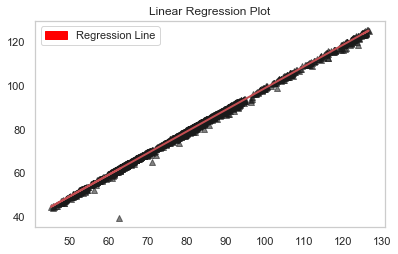

In [52]:
#Equation of Linear Regression
y=slope*X+intercept

#plotting the linear regression function
plt.scatter(X,Y,marker='^',color='k',alpha=0.55)
plt.plot(X,y,color='R',linewidth=2)
red_patch = mpatches.Patch(color='red', label='Regression Line')
plt.legend(loc=0,handles=[red_patch])
plt.title('Linear Regression Plot')
plt.tight_layout(pad=2)
plt.grid(False)
plt.show()

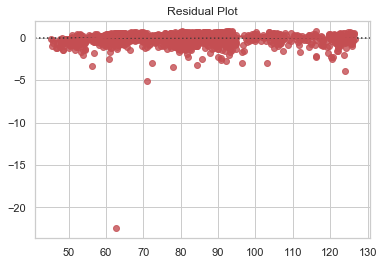

In [53]:
sns.set(style="whitegrid")
# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
#Plot the residuals after fitting a linear model
sns.residplot(X, Y, lowess=True, color="r")
plt.title('Residual Plot')
plt.show()


In [66]:
Y_dash = np.exp(y) * PG['Average'].shift(periods=1)
mean_error = np.mean(Y_dash - PG['Average'])
rms = sqrt(mean_squared_error(PG['Average'], Y_dash.fillna(0)))
print(rms)

1.286476291661687e+55


In [67]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)
 
# Test RMSE
actual = predictions
predicted = Y_validation
rmse = rmse_metric(actual, predicted)
print(rmse)

0.5216518444156181
